In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import cycle


In [3]:
sns.set(
    style="darkgrid",
    rc={
        "figure.figsize": (7.2, 4.45),
        "text.usetex": False,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "font.size": 15,
        "figure.autolayout": True,
        "axes.titlesize": 16,
        "axes.labelsize": 17,
        "lines.linewidth": 2,
        "lines.markersize": 6,
        "legend.fontsize": 15,
    },
)
colors = sns.color_palette("colorblind", 4)
# colors = sns.color_palette("Set1", 2)
# colors = ['#FF4500','#e31a1c','#329932', 'b', 'b', '#6a3d9a','#fb9a99']
dashes_styles = cycle(["-", "-.", "--", ":"])
sns.set_palette(colors)
colors = cycle(colors)

In [7]:
def moving_average(interval, window_size):
    if window_size == 1:
        return interval
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(interval, window, "same")

def plot_df(df, label="", color=""):
    df["system_mean_waiting_time"] = pd.to_numeric(df["system_mean_waiting_time"], errors="coerce")

    mean = df.groupby("step").mean()["system_mean_waiting_time"]
    x = df["step"].unique()

    plt.plot(x, mean, label=label, color=color)

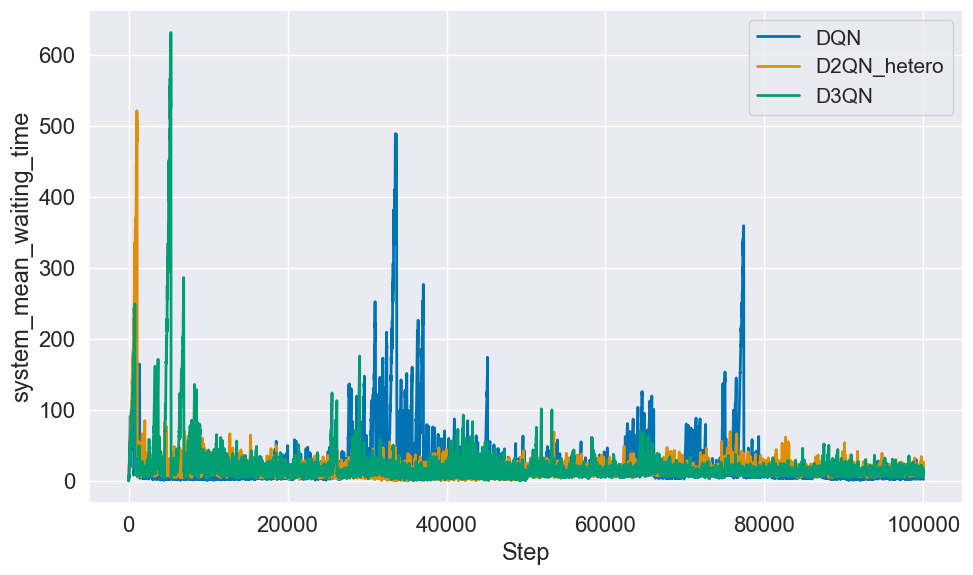

In [10]:



# List of .csv files
csv_files = ["./2way-single-intersection/homo_2024-10-24 09_03_13_ftlc_conn0_ep1.csv"
                "./2way-single-intersection/dqn_conn0_ep1.csv",
               "./2way-single-intersection/dueldqn/homo_2024-10-23 12_00_46_alpha0.1_gamma0.99_eps0.005_decay1_rewardwait_conn0_ep1.csv",
               "./2way-single-intersection/d3qn/homo_2024-10-23 15_16_00_alpha0.1_gamma0.99_eps0.005_decay1_rewardwait_conn0_ep1.csv"]
label=["FTLC","DQN","D2QN","D3QN"]
# Plotting
plt.figure(figsize=(10, 6))
i=int(0)
for file in csv_files:
    df = pd.read_csv(file)

    plot_df(df, label=label[i],color=next(colors))
    i+=1

# plt.title("accumulated_Waiting Time")
plt.xlabel("Step")
plt.ylabel("system_mean_waiting_time")
plt.legend()
plt.grid(True)
plt.show()
